<a href="https://colab.research.google.com/github/LunarByteFlow/Machine-Learning/blob/master/Pytorch_workFlow_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {
    1: "data(prepare and load)",
    2:"build model",
    3:"fitting the model to data(training)",
    4:"Making predictions and evaluating a model(inference)",
    5:"saving and loading a model",
    6:"Putting it all together"
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'Making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'Putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for Neural Networks.
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

### 1. Data(Preparing and Loading)
Data Can be almost anything in machine learning...
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has a lot of data...)
* Audio like songs or podcast
* DNA
* Text
Machine learning is a game of 2 parts
1. Get Data into numerical representation
2. Build a model to learn patterns in that numerical representation
To showcase this let's create some **known** data using linear regression formula.
We'll use a linear regression formula to make a straight line with known **Parameters**

In [ ]:
import torch

# create *known* parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight*X
X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in Machine Learning in general)
let's create a training and test set with our data

In [ ]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]
print(f"Training X data: {len(X_train)}")
print(f"Training y data: {len(y_train)}")
print(f"Test X data: {len(X_test)}")
print(f"Test y data: {len(y_test)}")




Training X data: 40
Training y data: 40
Test X data: 10
Test y data: 10


In [ ]:
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test,test_labels = y_test,predictions = None ):
  """
  Plots taining data, test data and compares predictions
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",s=4, label = "Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g",s=4, label = "Test Data")
  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions data")

  plt.legend(prop={"size": 14})




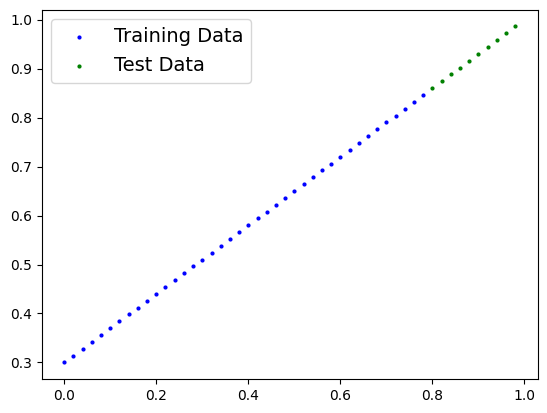

In [ ]:
plot_prediction()

### Building out first Pytorch Model
What our Model does
* start with random values.
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values
How does it do so?
By two main algorithms.
1. Gradient Decent. --> https://www.javatpoint.com/gradient-descent-in-machine-learning
2. Back Propagation. -->https://www.geeksforgeeks.org/backpropagation-in-neural-network/
What exactly does the forward method do?
* It defines the computations performed at exery cell.
* Should be overridden by all subclasses.
* You need to define a forward method if you are going to sub class nn.module.

In [ ]:
import torch
from torch import nn
# Create linear regression model class
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.weights*x + self.bias # This is the linear regression formula


### PyTorch Model building essentials
* torch.nn -> contains all of the building blocks for computational graphs (neural networks are also called computational graphs)
* torch.nn.parameter -> what parameters should our model try and learn often a pytorch layer from torch.nn will set these for us.
* torch.nn.Module -> The base class for all neural network modules, if you subclass it, you have to overwrite() forward.
* torch.optim -> this is where optimizers in pytorch live, they will help, they will help with gradient descent
* def forward() -> all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model( this is a subclass of nn.Module)
model_0 = LinearRegression()
list(model_0.parameters())

# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference()` mode.
To check our Model's Predictive power lets see how well it predicts `y_test` based on `x_text`
When we pass data through our model, its going to run it through the `forward()`method

Y for prediction values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
Y data for testing: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


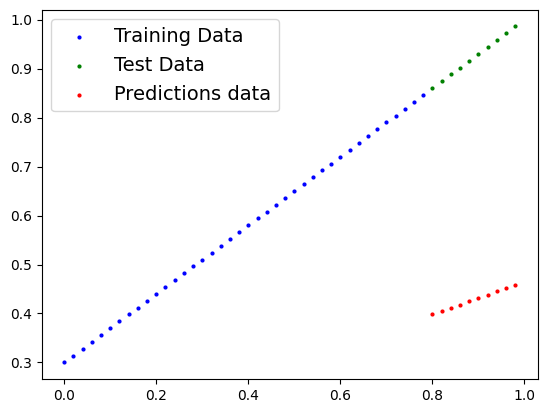

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)
  print(f"Y for prediction values: {y_pred}")

print(f"Y data for testing: {y_test}")
# This is similar to torch.inference_mode but an older method
# with torch.no_grad():
#   y_preds = model_0(X_test)
plot_prediction(predictions = y_pred)

### Training Mode
The whole idea of training is for a model to move from *Unknown* Parameters (these may be random) to some *Known* parameters.
Or in other words from a poor representation of the data to a better representation of the data.
One way to measure how poor or how wrong your model's predictions are is to use  a loss function.
Link for refrence -> https://pytorch.org/docs/stable/nn.html#loss-functions
* Note : Loss Function may also be called cost function or criterion in different areas.For our case we are going to refer it as a loss function.
Things we need to train:

* **Loss Function**: A loss functions is used to measure how wrong your model's predictions are to the ideal output, The lower the better.
* Optimizer: takes into account the loss of the model and adjust the model's parameters (e.g: Weight and bias) to improve the loss function.
* **Hyperparameters**: Hyoerparameters is a value that us as a data scientist or Machine learning Engineer set.

And specifically for PyTorch, we need:
* A training loop
* A testing Loop.


In [ ]:
import torch
# setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr = learning rate (hyperparameter)

In [ ]:
loss_fn
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a training loop and a testing loop in pytorch.
A couple of things we need in a training loop:
0. Loop through the data.
1. This involves moving data through our model's `forward()` functions - also called forward propagation.
2. calculate the loss, ( compare forward pass predictions to ground truth lables)
3. Optimizer zero grad.
4. Loss backward - Moves backwards to the network to calculate the gradients of each of the parameters of our model with respect to the loss - **backpropagation**
5. Optimizer Step - Use the optimizer to adjust our model's parameters to try and minimize(improve) the loss. **Optimizer Step**


In [ ]:
# An epocs is one loop through the data... this is a hyperparameter because we have set it ourselves.
epochs = 3000
# tracking experiments
epoc_count = []
loss_values = []
test_loss_values = []
# 0 loop through the data
for epoc in range(epochs):
  # set the model to training mode.
  model_0.train() # train mode in pytorch set all parameters that require parameters to require parameters.

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss.
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad.
  optimizer.zero_grad()

  # 4. perform backpropagation with respect to the parameters of the model.
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step() # by default how the optiizer changes will accumulate through the loop so... we have to zero it above in step 3

  model_0.eval() # turns of different settings not needed for evaluation (drop out/ batch norm layers)
  with torch.inference_mode(): # This turns off gradient tracking.
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoc % 10 == 0 :
    epoc_count.append(epoc)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoc}| loss: {loss}|Test Loss {test_loss}")
    print(model_0.state_dict())



  # print(f"loss = {loss}")




Epoch: 0| loss: 0.31288138031959534|Test Loss 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10| loss: 0.1976713240146637|Test Loss 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20| loss: 0.08908725529909134|Test Loss 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30| loss: 0.053148526698350906|Test Loss 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40| loss: 0.04543796554207802|Test Loss 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50| loss: 0.04167863354086876|Test Loss 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60| loss: 0.03818932920694351|Test Loss 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 70| loss: 0.034

In [ ]:
with torch.inference_mode():
  y_pred_train = model_0(X_train)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

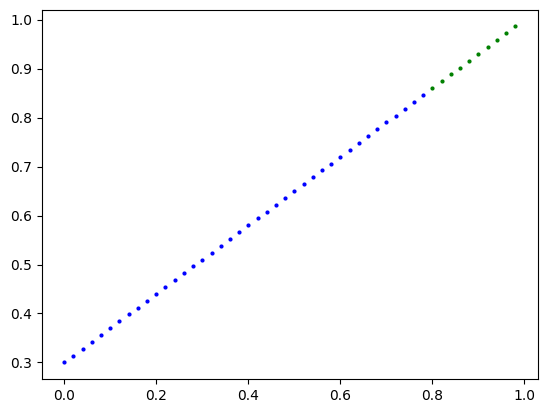

In [ ]:
plot_prediction(predictions = y_pred)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
import numpy
predictions = y_preds.detach().numpy()
plot_prediction(predictions =predictions)

In [ ]:
print(f"The ideal predictions for our model: {weight,bias}")

In [ ]:
import numpy as np
# plot the loss curves of our Linear Regression Model.
plt.plot(epoc_count, np.array(torch.tensor(loss_values).numpy()))
plt.plot(epoc_count, test_loss_values,label = test_loss)
plt.title("Training and Test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

### Saving a Model in PyTorch
There are three main methods you should know about for saving and loading models in pytorch:
1. `torch.save()` - Allows you to save a Pytorch object in python's pickle format.
2. `torch.load()` - Allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` -this allows to load a Model's saved state dictionary.
get more informations on : https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
# Saving our PyTorch Model.
from pathlib import Path
# 1. Create Model Directory.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create Model save path
MODEL_NAME = "Linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving the model {model_0}, to the loacation ; {MODEL_SAVE_PATH}")
torch.save( obj = model_0.state_dict(),f = MODEL_SAVE_PATH )

## loading a PyTorch Model
Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our Model class and load the  saved `state_dict()` into that.

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class.
loaded_model_0 = LinearRegression()
# Load the saved state dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model_0.state_dict()

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds == loaded_model_0(X_test)
print(loaded_model_preds)


In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds == model_0(X_test)
print(y_preds)

### Putting it all together
Let's go back through all the previous steps and see it all in one place

In [ ]:
# import Pytorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

 # check version of pytorch
torch.__version__


### Create device Agnostic code
This means that if we have access to a GPU our Model will use it (for Potentially faster computing). If no GPU is available our code will default to CPU

In [ ]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Devise: {device}")

In [ ]:
import torch
weight = 0.10
bias = 0.7
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight*X
X[:10], y[:30]
len(X),len(y)

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_Linear_regression(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels =y_test, predictions = None):
  """
  Plots taining data, test data and compares predictions
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b",s=4, label = "Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g",s=4, label = "Test Data")
  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r",s=4, label = "Predictions data")

  plt.legend(prop={"size": 14})


In [ ]:
plot_Linear_regression()

In [ ]:
plot_Linear_regression(predictions = X_test)

In [ ]:
import torch
from torch import nn
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True,dtype = torch.float ))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True,dtype = torch.float ))
  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
# create a random seed
LR_model = LinearRegression()
LR_model.state_dict()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = LR_model.parameters(), lr = 0.01)


In [ ]:
epochs = 300
epoc_count = []
loss_values = []
test_loss_values = []
# 0 Loop  through the data
for epoc in range(epochs):
  #Set the model to training mode
  LR_model.train()

  # 1 Forward Pass
  y_estimated = LR_model( X_train)

  # 2 Calculate the loss
  loss = loss_fn(y_estimated,y_train)

  # 3 Optimizer zero grad
  optimizer.zero_grad()

  # 4 perform back propagation
  loss.backward()

  # 5 step the optimizer
  optimizer.step()

  #set the model to testing mode
  LR_model.eval()

  with torch.inference_mode():
    test_pred = LR_model(X_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoc % 10 == 0 :
    epoc_count.append(epoc)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    # print(f"Epoch: {epoc}| loss: {loss}|Test Loss {test_loss}")
    # print(LR_model.state_dict())


In [ ]:
with torch.inference_mode():
  y_preds = LR_model(X_test)
import numpy
predictions =   y_preds.detach().numpy()
plot_Linear_regression(predictions =predictions)

In [ ]:
# Create a linear regression model with nn.Linear
import torch
from torch import nn
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # using nn.Linear to create the model parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)



model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

# Loading a Saved Model in pytorch

In [ ]:
# Loading a saved model in pytorch
# Create a new instance of the linear regression model V2
loaded_model_1 = LinearRegressionModelV2()
# Load the saved state_dict
loaded_model_1.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

